# 1. Load the dataset

In [2]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
df=pd.read_csv(r'C:\Users\bachw\Downloads\pyhton\Student Attitude and Behavior.csv')
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


# 2. Check shape of the dataset

In [3]:
df.shape

(235, 19)

# 3. Check info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

# 4 Check null and unique values in each column

In [5]:
df.isna().sum()

Certification Course                                      0
Gender                                                    0
Department                                                0
Height(CM)                                                0
Weight(KG)                                                0
10th Mark                                                 0
12th Mark                                                 0
college mark                                              0
hobbies                                                   0
daily studing time                                        0
prefer to study in                                        0
salary expectation                                        0
Do you like your degree?                                  0
willingness to pursue a career based on their degree      0
social medai & video                                      0
Travelling Time                                           0
Stress Level                            

In [6]:
df.nunique()

Certification Course                                       2
Gender                                                     2
Department                                                 4
Height(CM)                                                56
Weight(KG)                                                52
10th Mark                                                 67
12th Mark                                                 67
college mark                                              43
hobbies                                                    4
daily studing time                                         6
prefer to study in                                         3
salary expectation                                        34
Do you like your degree?                                   2
willingness to pursue a career based on their degree       5
social medai & video                                       6
Travelling Time                                            7
Stress Level            

# 5. Descriptive Statistics

In [7]:
df.describe()

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.848511,68.775872,70.660553,3.248168e+04
std,21.510805,14.895844,13.047560,11.018192,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


# 6. Gender distribution 

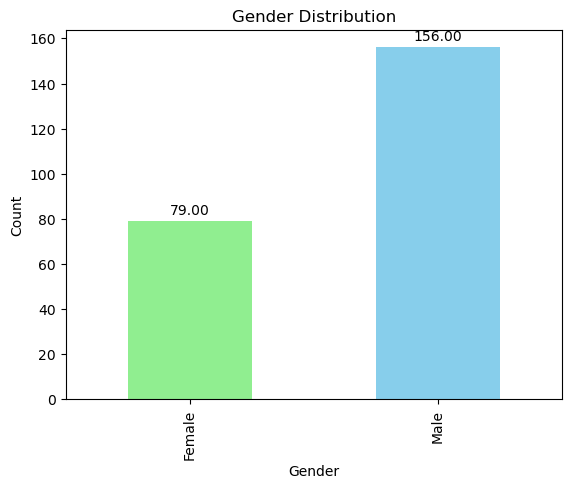

In [8]:
gen= df.groupby("Gender")["Gender"].count().plot.bar(color=("lightgreen","skyblue"),)
gen.set_title("Gender Distribution")
gen.set_xlabel("Gender")
gen.set_ylabel("Count")

for p in gen.patches:
    height = p.get_height()
    gen.text(p.get_x()+p.get_width()/2.,
             height + 3,
             '{:1.2f}'.format(height),
             ha="center")

The bar graph reveals a significant gender disparity in the dataset. There are nearly twice as many males (156) as females (79). This gender distribution is a notable observation.

# 7. Correlations and Relationships

**7.1 How does the college mark relate to the 10th and 12th marks?**

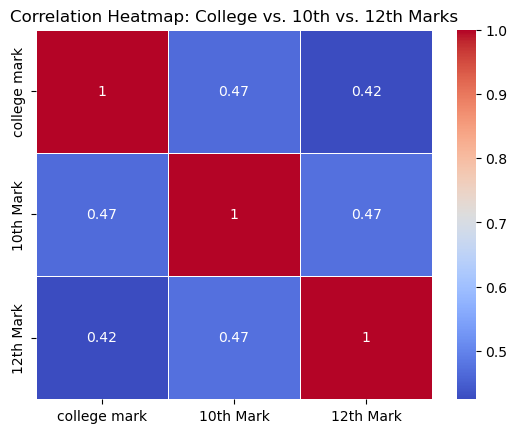

In [9]:
correlation_marks = df[['college mark', '10th Mark', '12th Mark']].corr()
sns.heatmap(correlation_marks, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: College vs. 10th vs. 12th Marks")
plt.show()

In this heatmap:
Positive correlations are represented by warmer colors (closer to 1).
Negative correlations are represented by cooler colors (closer to -1).
The diagonal represents the correlation of each variable with itself (always 1).

The correlation heatmap reveals moderate positive relationships between college marks and 10th/12th-grade marks. However, these correlations are not strong enough to predict performance solely based on these marks.

**7.2 How does the preference for study time (morning, anytime) impact academic performance?**

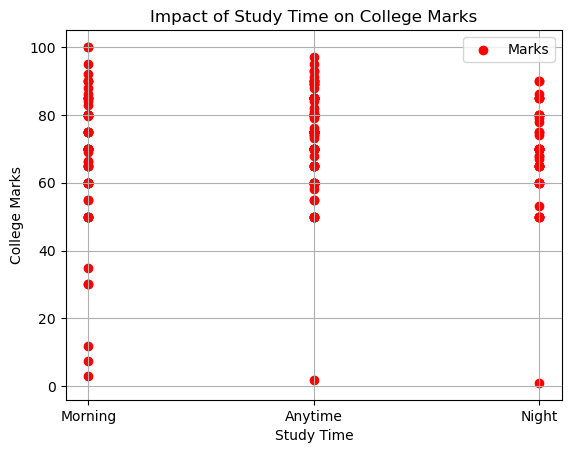

In [16]:
plt.scatter(df['prefer to study in'], df['college mark'], color='r', label='Marks')
plt.xlabel('Study Time')
plt.ylabel('College Marks')
plt.title('Impact of Study Time on College Marks')
plt.grid(True)
plt.legend()
plt.show()

Students who study anytime tend to achieve higher college marks.
While morning and night study times show variability, anytime studying consistently leads to better performance.
This suggests that flexibility in study schedules (anytime studying), positively impacts academic outcomes.

**7.3 Do students who like their degree tend to perform better in college?**

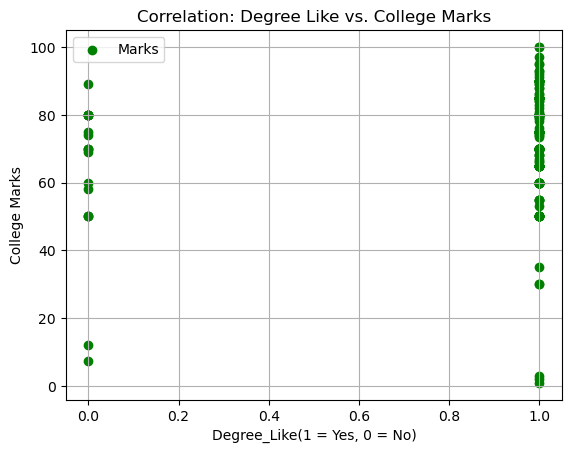

Correlation coefficient: 0.13


In [21]:
df['Degree_like'] = df['Do you like your degree?'].map({'Yes': 1, 'No': 0})
correlation_coefficient = df['Degree_like'].corr(df['college mark'])
plt.scatter(df['Degree_like'], df['college mark'], color='g', label='Marks')
plt.xlabel('Degree_Like(1 = Yes, 0 = No)')
plt.ylabel('College Marks')
plt.title('Correlation: Degree Like vs. College Marks')
plt.grid(True)
plt.legend()
plt.show()

print(f"Correlation coefficient: {correlation_coefficient:.2f}")

The correlation coefficient of 0.13 indicates a very weak positive correlation.
A positive coefficient suggests that students who like their degree tend to have slightly higher college marks, but the effect is minimal.
The value being close to zero implies that other factors likely play a more significant role in determining college performance.

# 8. Outliers in Dataset

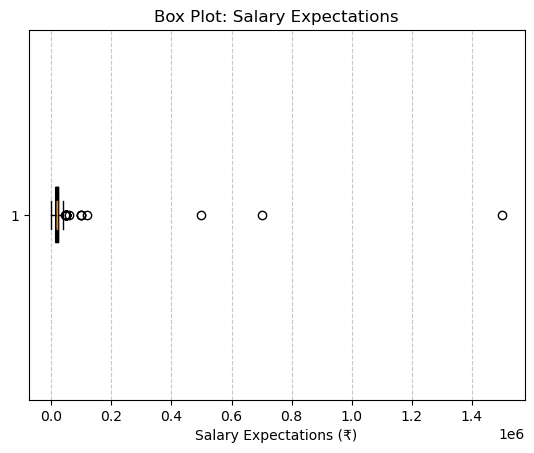

In [11]:
salary_expectations = df["salary expectation"]
plt.boxplot(salary_expectations, vert=False, notch=True, patch_artist=True)
plt.xlabel('Salary Expectations (₹)')
plt.title('Box Plot: Salary Expectations')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The box plot for salary expectations reveals a significant outlier—a salary expectation of ₹1,500,000 (1.5 million). Most students have lower salary expectations, with the median around ₹32,481.

# 9. Time-Based Insights

**9.1 How does daily studying time impact college marks?**

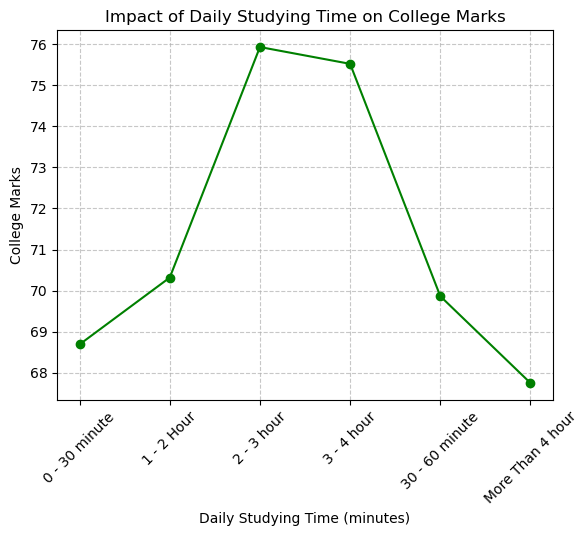

In [17]:

y = df.groupby("daily studing time")["college mark"].mean()
plt.plot(y.index, y.values, marker='o', color='g')
plt.xlabel('Daily Studying Time (minutes)')
plt.xticks(rotation=45)
plt.ylabel('College Marks')
plt.title('Impact of Daily Studying Time on College Marks')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

Students who study for 3 to 4 hours daily tend to achieve the highest college marks.
Marks decrease when study time is less than 1 hour or exceeds 4 hours.
The peak in marks occurs at the 3-4 hours study category.

# 10. Average salary expectations vs. willingness to pursue a career based on their degree

**How does financial status (salary expectations) influence students’ willingness to pursue a career based on their degree?**

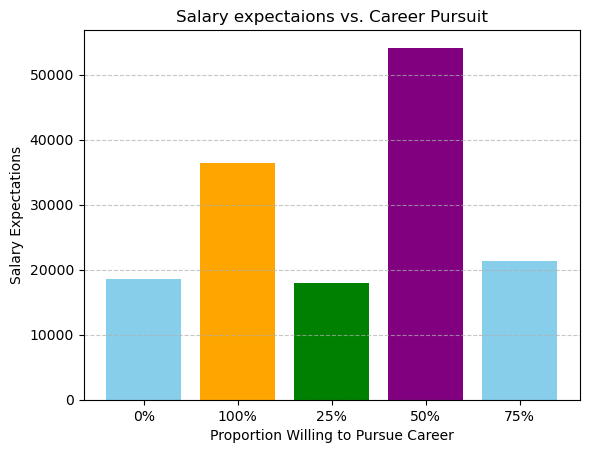

In [22]:
salarywill = df.groupby('willingness to pursue a career based on their degree  ')["salary expectation"].mean()
salarywill
plt.bar(salarywill.index, salarywill.values, color=['skyblue', 'orange', 'green', 'purple'])
plt.xlabel('Proportion Willing to Pursue Career')
plt.ylabel('Salary Expectations')
plt.title('Salary expectaions vs. Career Pursuit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 11. The relationship between stress levels, financial status, and college marks

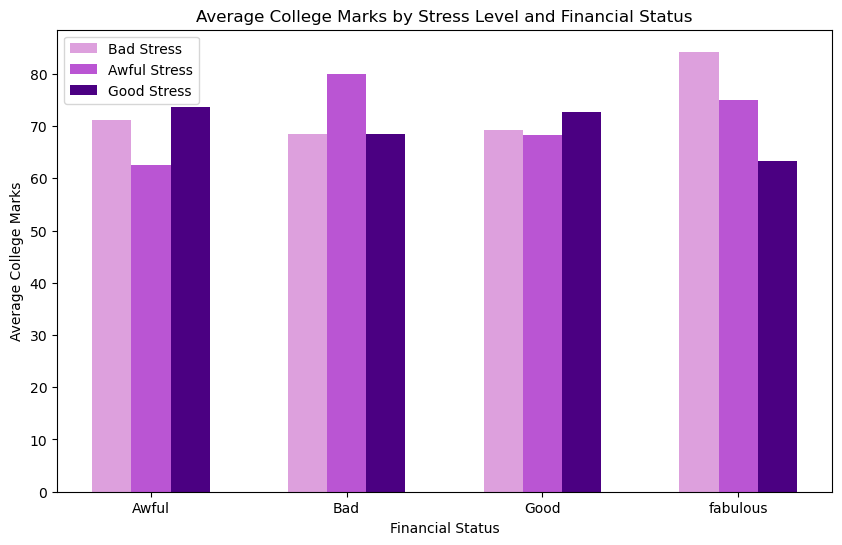

In [45]:
grouped_data = df.groupby(['Stress Level ', 'Financial Status'])['college mark'].mean().unstack()

x = np.arange(len(grouped_data))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, grouped_data['Bad'], width, label='Bad Stress', color='plum')
ax.bar(x, grouped_data['Awful'], width, label='Awful Stress', color='mediumorchid')
ax.bar(x + width, grouped_data['good'], width, label='Good Stress', color='indigo')

ax.set_xticks(x)
ax.set_xticklabels(grouped_data.index)
ax.set_xlabel('Financial Status')
ax.set_ylabel('Average College Marks')
ax.set_title('Average College Marks by Stress Level and Financial Status')
ax.legend()

plt.show()

Financial Status Impact: Students with fabulous financial status tend to have the highest average college marks across all stress levels.

Stress Levels and Marks: Within each financial category, students experiencing good stress achieve better average marks compared to those with bad or awful stress.